In [107]:
#First of all, let's import all required Python Libraries which are required for analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
%matplotlib inline


In [108]:
#Read the source file (Raw data having Air Quality Sample values)
dt= pd.read_csv("./AirQualityUCI.csv")

In [109]:
#Glimpse of dataset by selecting top 5 rows 
dt.head(5)
#Assign a new dataframe for calculation just as a safe side
df=dt
#See top 5 rows to understand how data looks like 
df.head(5)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [110]:
# Below section of code will rename the columns for better readability 

df = df.rename(columns={
                        'CO(GT)' : 'CarbonMonoxide',
                        'PT08.S1(CO)' : 'TinOxide', 
                        'NMHC(GT)' : 'NonMetalicHydrocarbon', 
                        'C6H6(GT)' : 'Benzene',  
                        'PT08.S2(NMHC)' : 'Titania', 
                        'NOx(GT)' : 'NitrogenOxide', 
                        'PT08.S3(NOx)' : 'TungstenOxideNOx', 
                        'NO2(GT)' : 'NitrogenDioxide', 
                        'PT08.S4(NO2)' : 'TungstenOxideNO2', 
                        'PT08.S5(O3)' : 'IndiumOxide', 
                        'T' : 'Temperature', 
                        'RH' : 'RelativeHumidity', 
                        'AH' : 'AbsoluteHumidity'    
                       })

In [111]:
#Check the column names after change
df.columns


Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [112]:
#See top 5 rows to understand how data looks like after changing column names
df.head(5)

Date      Time  CarbonMonoxide  TinOxide  NonMetalicHydrocarbon  \
0  3/10/2004  18:00:00             2.6      1360                    150   
1  3/10/2004  19:00:00             2.0      1292                    112   
2  3/10/2004  20:00:00             2.2      1402                     88   
3  3/10/2004  21:00:00             2.2      1376                     80   
4  3/10/2004  22:00:00             1.6      1272                     51   

   Benzene  Titania  NitrogenOxide  TungstenOxideNOx  NitrogenDioxide  \
0     11.9     1046            166              1056              113   
1      9.4      955            103              1174               92   
2      9.0      939            131              1140              114   
3      9.2      948            172              1092              122   
4      6.5      836            131              1205              116   

   TungstenOxideNO2  IndiumOxide  Temperature  RelativeHumidity  \
0              1692         1268         13.6              48.9   
1              1559          972         13.3              47.7   
2              1555         1074         11.9              54.0   
3              1584         1203         11.0              60.0   
4              1490         1110         11.2              59.6   

   AbsoluteHumidity  
0            0.7578  
1            0.7255  
2            0.7502  
3            0.7867  
4            0.7888

In [113]:
# This dataset is having -200 as null values so we will replace -200 with null values and drop all null values 
df[df == -200]=np.NAN

In [114]:
# Considering we dont have any business logic to fill null/dirty values we will drop them as of now 
df=df.dropna()

In [115]:
# Let's see how much good data we have 
df.shape

(827, 15)

In [116]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

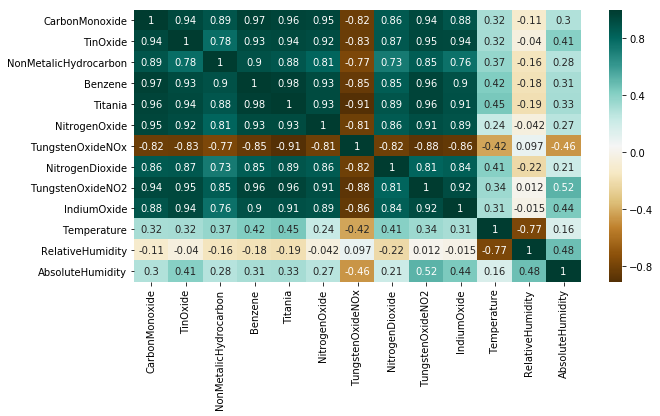

In [117]:
# Time to visualise correlation by heatmap and understand the feature importance
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [118]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

**********************************


Based on the visualisation shown in AirQuality_LinearRegression we identified some of good features

***************************************

In [119]:
features=['Temperature','IndiumOxide','TungstenOxideNO2']
X=df[features]
y=df['RelativeHumidity']

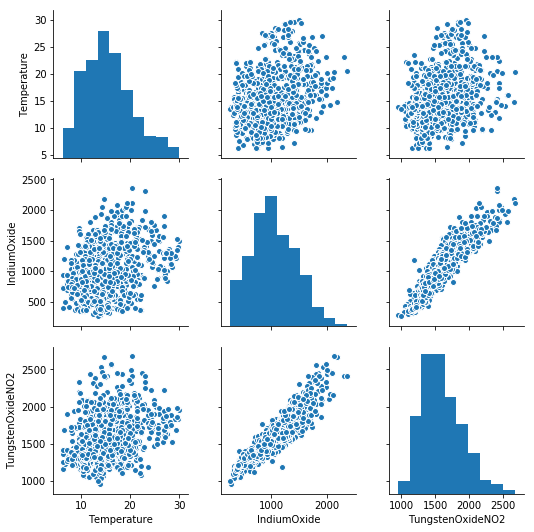

In [120]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [121]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [122]:
features=['Temperature','IndiumOxide','TungstenOxideNO2']
X=df[features]
y=df['RelativeHumidity']

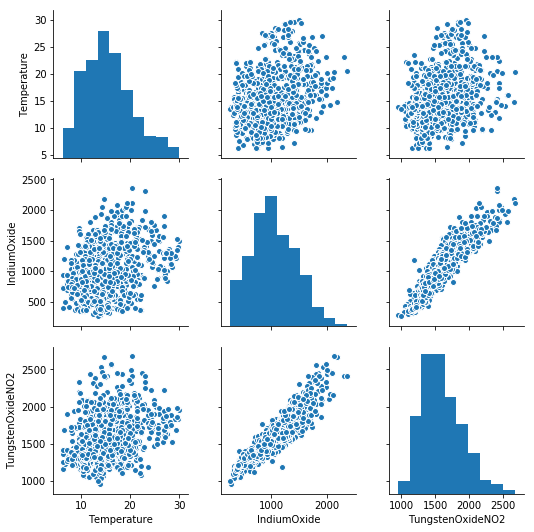

In [123]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_test.head(2)

(578, 3)
(249, 3)
(578,)
(249,)


Temperature  IndiumOxide  TungstenOxideNO2
389          9.9        644.0            1258.0
888         14.0       1385.0            2083.0

In [125]:
y_test.head(2)

389    50.2
888    76.3
Name: RelativeHumidity, dtype: float64

********************************************

Let's scale  our data

********************************************

In [126]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)





********************************************

Lets' find RMSE for multiple KNN models and check their RMSE 

********************************************

In [129]:
k_range = range(1,10)

rmse_val = [] #to store rmse values for different k
# We can create Python dictionary using [] or dict()
scores = []

for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values    
    print('RMSE value for k= ' , K , 'is:', error)
    scores.append(model.score(X_test,y_test))   

RMSE value for k=  2 is: 8.818956057480676
RMSE value for k=  3 is: 8.171521383042496
RMSE value for k=  4 is: 7.963476491540946
RMSE value for k=  5 is: 7.811618779216458
RMSE value for k=  6 is: 7.731697522947039
RMSE value for k=  7 is: 7.781182235615214
RMSE value for k=  8 is: 7.7216068014620864
RMSE value for k=  9 is: 7.674491444391684
RMSE value for k=  10 is: 7.705034576906537


Text(0.5,1,'Value of K vs Testing Accuracy')

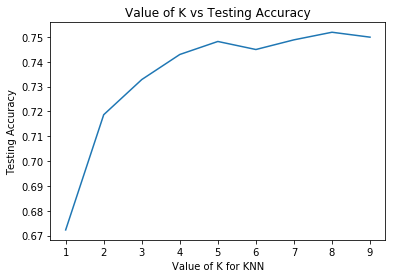

In [130]:
# plot the relationship between K and testing accuracy
#title('Python Line Chart: Plotting numbers')

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title ('Value of K vs Testing Accuracy')

Text(0.5,1,'Value of K vs RMSE')

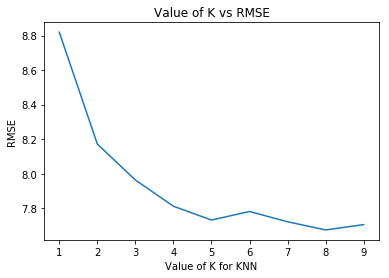

In [131]:
# plot the relationship between K and testing accuracy
#title('Python Line Chart: Plotting numbers')

plt.plot(k_range, rmse_val)
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.title ('Value of K vs RMSE')

********************************************

Based on above results/graphs we can see for K = 6 , we have good results 

Let's plot Elbow curve to visualise optimum K value<br><br>

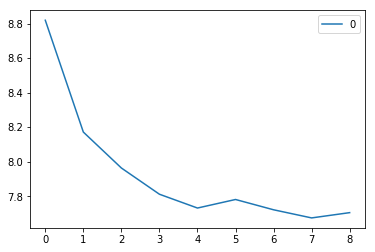

In [132]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [133]:
#Let's predict
predict = model.predict(X_test)


In [134]:
predict

array([57.68, 60.11, 44.51, 23.65, 46.3 , 66.27, 25.9 , 50.01, 46.69,
       57.69, 55.96, 49.22, 36.04, 51.21, 31.2 , 44.63, 56.01, 68.04,
       66.3 , 67.78, 43.07, 69.01, 50.17, 67.  , 56.88, 48.09, 32.12,
       30.86, 44.63, 38.35, 29.63, 23.19, 63.34, 47.32, 28.03, 47.92,
       60.11, 60.79, 28.32, 67.8 , 63.57, 65.3 , 60.41, 41.31, 53.34,
       60.12, 60.35, 47.45, 29.78, 53.61, 27.04, 47.08, 53.4 , 57.05,
       45.78, 39.66, 27.51, 51.73, 55.63, 31.63, 63.34, 34.87, 45.28,
       67.02, 50.21, 55.88, 26.7 , 48.4 , 64.7 , 60.88, 61.4 , 61.77,
       43.03, 62.67, 60.37, 64.85, 56.27, 58.88, 34.46, 61.99, 50.8 ,
       51.21, 45.56, 49.5 , 62.46, 41.06, 50.29, 52.68, 65.73, 50.92,
       49.1 , 53.18, 29.37, 64.35, 50.13, 42.59, 60.26, 56.35, 23.59,
       34.29, 64.92, 34.66, 23.11, 64.51, 57.37, 25.91, 58.53, 42.36,
       67.48, 42.26, 40.33, 30.18, 49.39, 47.89, 57.41, 57.91, 63.35,
       68.27, 52.51, 57.38, 45.56, 56.31, 64.65, 58.17, 64.43, 57.1 ,
       52.1 , 65.76,

## Score of KNN Model 

## we can use Gridsearchcv as well to identify the optimum model values

In [135]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=6)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 6}

In [136]:
model.score(X_test,y_test)

0.7481281948281221

## So best score from this KNN = 74.81

<br><br><br><br><br><br><br><br><br>

## Lets work for KMeans Model

In [137]:
features=['Temperature','IndiumOxide','TungstenOxideNO2']
X=df[features]
y=df['RelativeHumidity']

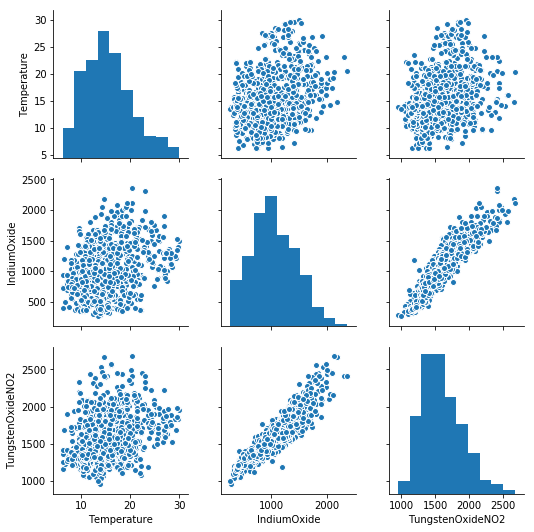

In [138]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
ss=StandardScaler()
dff=ss.fit_transform(X)


dff.std()

1.0

In [140]:
ssw = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dff)        
    #centroids = kmeanModel.centroids
    ssw.append(sum(np.min(cdist(dff, kmeanModel.cluster_centers_, 'cityblock'), axis=1)) / dff.shape[0])

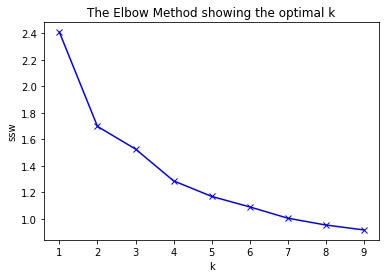

In [141]:
plt.plot(K, ssw, 'bx-')
plt.xlabel('k')
plt.ylabel('ssw')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [142]:
my_kmeans=KMeans(n_clusters=6)
km_model=my_kmeans.fit(dff)


In [143]:
km_model.cluster_centers_

array([[ 0.60336529,  1.89454834,  2.09516116],
       [-0.8881096 , -1.11330474, -1.0911391 ],
       [ 0.52617163, -0.69424001, -0.57520033],
       [ 1.91247396,  0.56156752,  0.59413869],
       [-0.6375289 , -0.01078433, -0.1339323 ],
       [-0.03302808,  0.95205055,  0.85716725]])

In [144]:
size=km_model.labels_
size=list(size)
## Size of each cluster 
print(size.count(0))
print(size.count(1))
print(size.count(2))
print(size.count(3))
print(size.count(4))


63
177
157
87
196


In [145]:
df['Cluster'] = km_model.labels_
df.head()

Date      Time  CarbonMonoxide  TinOxide  NonMetalicHydrocarbon  \
0  3/10/2004  18:00:00             2.6    1360.0                  150.0   
1  3/10/2004  19:00:00             2.0    1292.0                  112.0   
2  3/10/2004  20:00:00             2.2    1402.0                   88.0   
3  3/10/2004  21:00:00             2.2    1376.0                   80.0   
4  3/10/2004  22:00:00             1.6    1272.0                   51.0   

   Benzene  Titania  NitrogenOxide  TungstenOxideNOx  NitrogenDioxide  \
0     11.9   1046.0          166.0            1056.0            113.0   
1      9.4    955.0          103.0            1174.0             92.0   
2      9.0    939.0          131.0            1140.0            114.0   
3      9.2    948.0          172.0            1092.0            122.0   
4      6.5    836.0          131.0            1205.0            116.0   

   TungstenOxideNO2  IndiumOxide  Temperature  RelativeHumidity  \
0            1692.0       1268.0         13.6              48.9   
1            1559.0        972.0         13.3              47.7   
2            1555.0       1074.0         11.9              54.0   
3            1584.0       1203.0         11.0              60.0   
4            1490.0       1110.0         11.2              59.6   

   AbsoluteHumidity  Cluster  
0            0.7578        4  
1            0.7255        4  
2            0.7502        4  
3            0.7867        4  
4            0.7888        4

In [146]:
clust_profile = pd.pivot_table(df, values=['Temperature','IndiumOxide','TungstenOxideNO2'],index='Cluster',aggfunc=np.mean)
clust_profile

IndiumOxide  Temperature  TungstenOxideNO2
Cluster                                            
0        1803.428571    18.511111       2233.587302
1         600.610169    11.318644       1270.977401
2         768.191083    18.138854       1426.847134
3        1270.379310    24.824138       1780.114943
4        1041.500000    12.527041       1560.158163
5        1426.530612    15.442177       1859.578231

In [147]:
cluster_profile_state = pd.DataFrame({'labels':df['Cluster'], 'RelativeHumidity':df['RelativeHumidity']})
cluster_profile_state.sort_values('labels')


labels  RelativeHumidity
1230       0              66.8
121        0              42.5
120        0              35.4
113        0              38.5
112        0              45.6
111        0              54.3
110        0              63.9
1056       0              30.8
122        0              52.6
1141       0              48.5
98         0              46.1
97         0              41.7
1165       0              58.3
1166       0              54.8
1167       0              46.4
1176       0              37.3
50         0              50.5
1142       0              40.3
123        0              57.4
136        0              42.9
137        0              33.3
1057       0              36.7
1058       0              40.8
1047       0              42.1
1046       0              53.3
889        0              78.0
866        0              49.8
865        0              47.8
864        0              44.1
863        0              35.5
...      ...               ...
126        5              65.7
124        5              60.2
530        5              40.9
698        5              39.8
696        5              28.6
689        5              34.2
101        5              55.9
501        5              59.3
100        5              51.0
182        5              60.0
289        5              47.4
471        5              28.8
472        5              28.2
473        5              26.6
307        5              53.4
305        5              55.8
1060       5              44.9
1061       5              47.7
1062       5              49.7
1063       5              57.4
493        5              58.2
494        5              61.1
1070       5              51.9
1071       5              45.0
304        5              62.9
303        5              69.7
291        5              49.7
290        5              47.4
288        5              43.1
625        5              47.5

[827 rows x 2 columns]

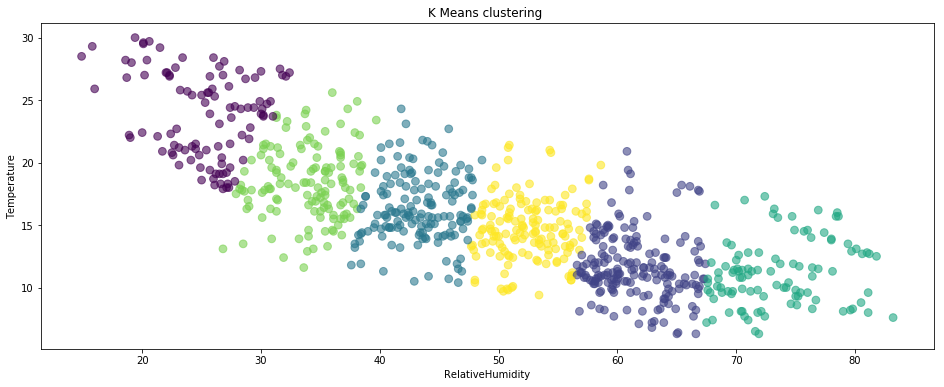

In [148]:
k_means = KMeans(n_clusters=6, init='k-means++', random_state=5000)
k_means.fit(df[['Temperature', 'RelativeHumidity']])
fig = plt.figure(figsize=(16,6))
plt.scatter(df['RelativeHumidity'],df['Temperature'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('RelativeHumidity')
plt.ylabel('Temperature')
plt.title('K Means clustering ')
#[plt.text(row.RelativeHumidity, row.Temperature, row.RelativeHumidity) for row in df.itertuples()]
plt.show()